# Analise de Sentimento com Dicionario Léxico

### Objetivo
Analisar as emoções em comentários (textos) da PlayStore aplicativos de redes sociais como:Facebook,Instagram,Twitter,Tik Tok, WhatsApp e Linkedin

O SentilexPT é um dicionário léxico para o idioma Português que está disponível para pesquisa e desenvolvimento.
Você encontrar dicionário léxico neste link:
https://b2share.eudat.eu/records/93ab120efdaa4662baec6adee8e7585f

* Os léxicos são bancos de dados criados manualmente ou de forma automatizada.
* A vantagem dos léxicos é que você não precisa rotular dados para treinamento.
* A maior desvantagem é que os léxicos são limitados a idioma e tamanho da base de dados.
* Existem léxicos voltados para áreas específicas como: **Linguística, Psicologia, Direito**.




In [105]:
# Importando as Bibliotecas 
from nltk import word_tokenize
import nltk
import re
import pandas as pd
import re
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from os import path
import matplotlib.pyplot as plt

In [106]:
# Importando Dicionario SentilexPT 
sentilexpt = open('SentiLex-PT01/SentiLex-lem-PT01.txt','r')

In [107]:
# importando a base reviews que foi gerado no extrator 
df = pd.read_csv('reviews.csv',encoding='utf-8')

In [108]:
#Visulizar dados reviews
df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,sortOrder,appId
0,gp:AOqpTOGtgEcw3mv64yFQrLaHJ_Kbqsj5Zm15bFQOb4n...,Mayara Prudente,https://lh3.googleusercontent.com/-MpHRYfXe0DI...,Então tenho o app para ajudar nas curtidas e v...,1,763,16.6.43,2020-07-13 13:07:56,NaN,NaN,most_relevant,com.zhiliaoapp.musically
1,gp:AOqpTOE0-OUh-Pe304rx0RkVC46aKpQKl9v7_vMVXID...,Gildeon Ribeiro Rocha,https://lh3.googleusercontent.com/a-/AOh14GiAG...,"O aplicativo em si é bom, o problema está quan...",1,1517,16.6.4,2020-06-29 11:38:53,"Olá, obrigado pela classificação, você levanta...",2020-07-09 04:29:41,most_relevant,com.zhiliaoapp.musically
2,gp:AOqpTOFSfvXWDpqgpXC9v_GdIC8_FxoHdn9aUKJzpJK...,Kirito Kirisuna,https://lh3.googleusercontent.com/a-/AOh14Ghsr...,"Sinceramente, antes de você criar a sua conta ...",1,1928,16.6.4,2020-07-08 18:53:45,NaN,NaN,most_relevant,com.zhiliaoapp.musically
3,gp:AOqpTOH7XiaEbEAF_yctVdEpgRIifMwanrTIzTffzMW...,EZEQUIEL_ CARVALHO.,https://lh3.googleusercontent.com/a-/AOh14Ghzv...,Poxa eu tento gravar sem travar mais continua ...,1,18,16.6.43,2020-07-13 10:39:17,NaN,NaN,most_relevant,com.zhiliaoapp.musically
4,gp:AOqpTOFc1okg3e2HDlzGjO-JZUjE-Gz3nCHgWE6Agyr...,Kitty Luar,https://lh3.googleusercontent.com/a-/AOh14GgSe...,Eu estou extremamente desapontada pelo fato do...,1,1635,16.6.4,2020-06-24 14:10:10,NaN,NaN,most_relevant,com.zhiliaoapp.musically


In [109]:
#dropar coluna content para aplicar a função sentimento.
df.drop_duplicates(['content'], inplace=True)

In [110]:
#criando um atributo resenha que vai armazenar as frases
resenha2 = df['content']
resenha2

0       Então tenho o app para ajudar nas curtidas e v...
1       O aplicativo em si é bom, o problema está quan...
2       Sinceramente, antes de você criar a sua conta ...
3       Poxa eu tento gravar sem travar mais continua ...
4       Eu estou extremamente desapontada pelo fato do...
                              ...                        
7191    Muito prático, e t dar muito aprendizado, sem ...
7192                   Excelente experiencia no novo app.
7193    Evolução do mercado de trabalho e atualização ...
7194    Gosto muito do aplicativo, muito bom para novo...
7197                                         Excelente!!!
Name: content, Length: 6337, dtype: object

In [111]:
# Função para obter a posição do caracter ponto, pegar a palavra, polaridade de cada palavra.
dic_palavra_polaridade = {}
for i in sentilexpt.readlines():
    pos_ponto = i.find('.')            
    palavra = (i[:pos_ponto])          
    pol_pos = i.find('POL')            
    polaridade = (i[pol_pos+4:pol_pos+6]).replace(';','')         
    dic_palavra_polaridade[palavra] = polaridade                 

# Processando Frases - Bases de Dados

In [112]:
# remove links, pontos, virgulas,ponto e virgulas das frases
def Limpeza_dados(instancia):
    # remove links, pontos, virgulas,ponto e virgulas dos tweets
    instancia = re.sub(r"http\S+", "", instancia).lower().replace('.','').replace(';','').replace('-','').replace(':','').replace('!','').replace(')','')
    return (instancia)

In [113]:
## Testando a função Limpeza de dados 
Preprocessing('Excelente...')

'excel'

In [114]:
#Visualizar os comentários limpos no DataFrame
resenha = pd.DataFrame(resenha2,columns=['content'])
resenha

,content
0,Então tenho o app para ajudar nas curtidas e v...
1,"O aplicativo em si é bom, o problema está quan..."
2,"Sinceramente, antes de você criar a sua conta ..."
3,Poxa eu tento gravar sem travar mais continua ...
4,Eu estou extremamente desapontada pelo fato do...
...,...
7191,"Muito prático, e t dar muito aprendizado, sem ..."
7192,Excelente experiencia no novo app.
7193,Evolução do mercado de trabalho e atualização ...
7194,"Gosto muito do aplicativo, muito bom para novo..."


# Aplicando analise de sentimento

In [115]:
# Função para aplicar sentimento Positivo,Neutro e Negativo
def Score_sentimento(frase):
    frase = frase.lower()                     # coloca toda a frase em minusculo
    l_sentimento = []                         # cria uma lista vazia
    for p in frase.split():
        l_sentimento.append(int(dic_palavra_polaridade.get(p, 0)))      # para cada palavra obtem a polaridade
    print (l_sentimento)                                                # imprime a lista de polaridades
    score = sum(l_sentimento)                                           # soma todos os valores da lista
    if score > 0:
        return 'Positivo'.format(score)                       # se maior que 0 retorna 'positivo'
    elif score == 0:
        return 'Neutro'.format(score)                         # se igual a 0 retorna 'neutro'
    else:   
        return 'Negativo'.format(score)       

### Testando a função Score_Sentimento:

In [116]:
Score_sentimento('gosto muito do aplicativo')

[0, 0, 0, 0]


'Neutro'

In [117]:
Score_sentimento('Estou muito triste, desanimado com algumas coisas')

[0, 0, 0, -1, 0, 0, 0]


'Negativo'

In [118]:
# Depois que foi realizado toda limpeza do dados agora aplicar função de sentimento para todas frases.
resenha['sentimento'] = resenha.apply(lambda row: Score_sentimento(row['content']),axis=1)

 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0

In [119]:
#Visualizando Sentimento de cada frase
resenha

,content,sentimento
0,Então tenho o app para ajudar nas curtidas e v...,Negativo
1,"O aplicativo em si é bom, o problema está quan...",Neutro
2,"Sinceramente, antes de você criar a sua conta ...",Neutro
3,Poxa eu tento gravar sem travar mais continua ...,Neutro
4,Eu estou extremamente desapontada pelo fato do...,Positivo
...,...,...
7191,"Muito prático, e t dar muito aprendizado, sem ...",Neutro
7192,Excelente experiencia no novo app.,Positivo
7193,Evolução do mercado de trabalho e atualização ...,Positivo
7194,"Gosto muito do aplicativo, muito bom para novo...",Positivo


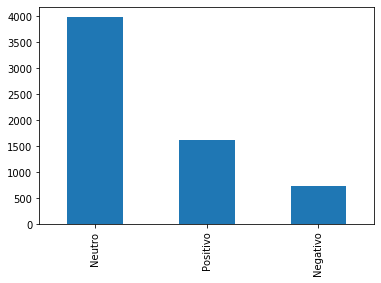

In [120]:
#Plotando quantidade de sentimentos gerado.
%matplotlib inline
resenha.sentimento.value_counts().plot(kind='bar');